In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import seaborn as sns

import scipy.cluster.hierarchy as sch
# !pip install kaleido
import kaleido
# !pip install plotly-express
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#DataSet: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=data-dictionary.csv
data = pd.read_csv("D:/DataSets/Predictive Analysis_MLDL/Country-data.csv")

# Data Understanding

In [3]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
data.shape

(167, 10)

In [5]:
data.sample(5)

country  child_mort  exports  health  imports  income  inflation  \
109         Nepal        47.0     9.58    5.25     36.4    1990      15.10   
132  Sierra Leone       160.0    16.80   13.10     34.5    1220      17.20   
98          Malta         6.8   153.00    8.65    154.0   28300       3.83   
142         Sudan        76.7    19.70    6.32     17.2    3370      19.60   
93     Madagascar        62.2    25.00    3.77     43.0    1390       8.79   

     life_expec  total_fer   gdpp  
109        68.3       2.61    592  
132        55.0       5.20    399  
98         80.3       1.36  21100  
142        66.3       4.88   1480  
93         60.8       4.60    413

In [6]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 167 entries, 0 to 166

Data columns (total 10 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   country     167 non-null    object 

 1   child_mort  167 non-null    float64

 2   exports     167 non-null    float64

 3   health      167 non-null    float64

 4   imports     167 non-null    float64

 5   income      167 non-null    int64  

 6   inflation   167 non-null    float64

 7   life_expec  167 non-null    float64

 8   total_fer   167 non-null    float64

 9   gdpp        167 non-null    int64  

dtypes: float64(7), int64(2), object(1)

memory usage: 13.2+ KB


In [8]:
data.duplicated().sum()

0

In [9]:
len(data["country"].unique())

167

# Exploratory Data Analysis

In [10]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

Univariant Analysis

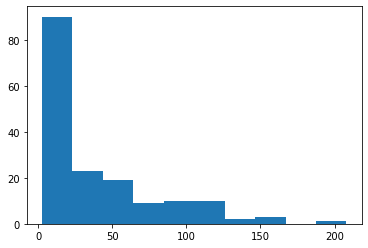

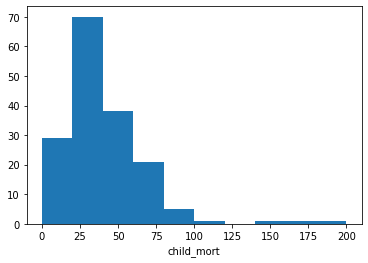

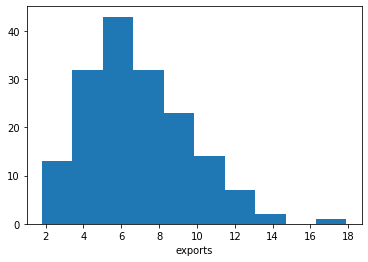

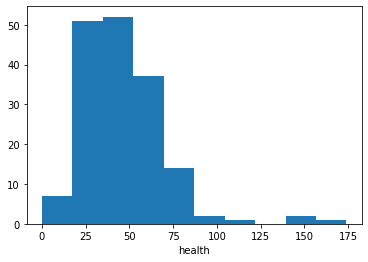

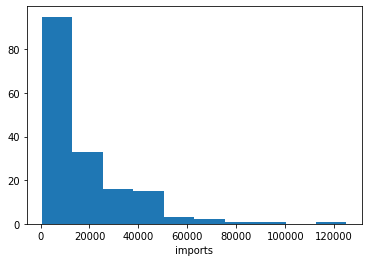

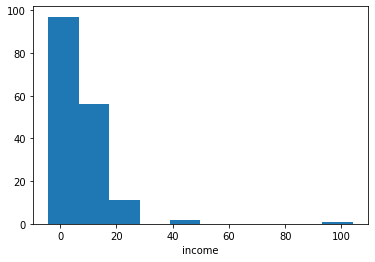

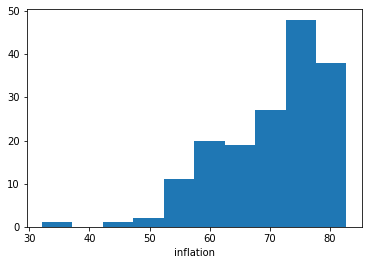

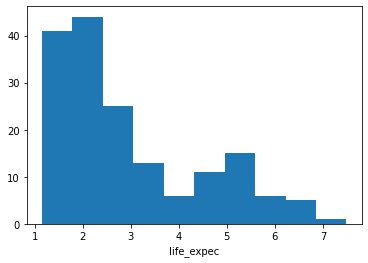

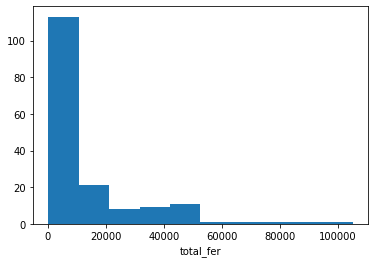

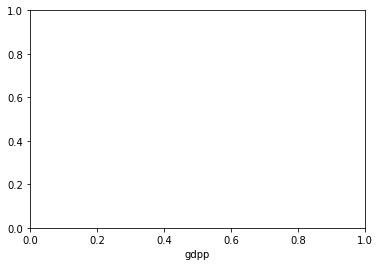

In [11]:
# Histogram
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(plt.hist(data[data.columns[i]]))
        plt.xlabel(data.columns[i])

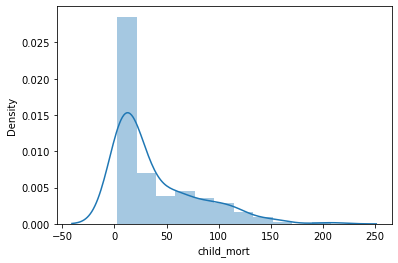

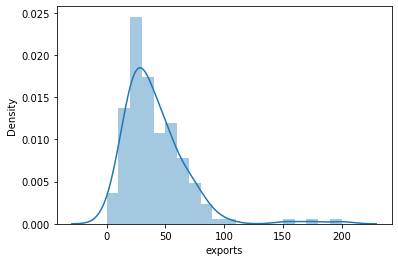

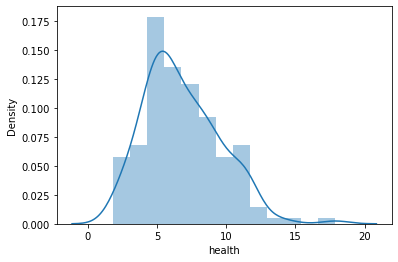

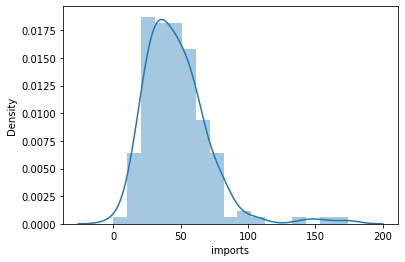

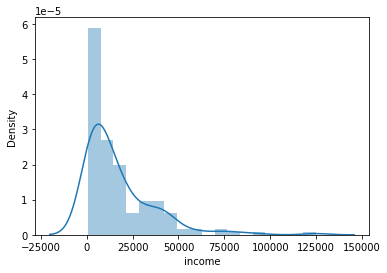

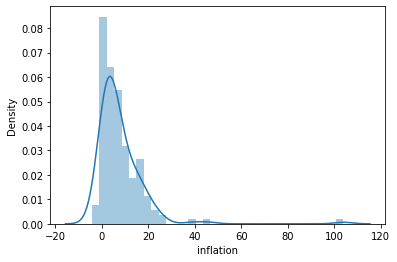

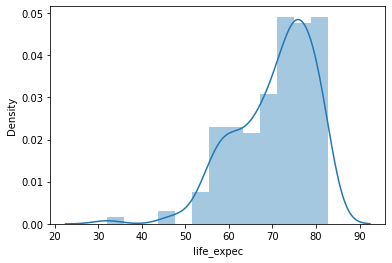

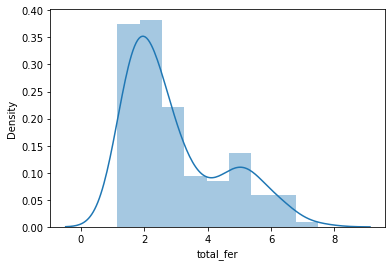

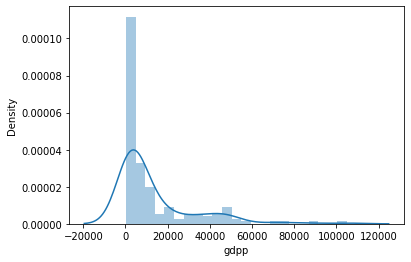

In [12]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

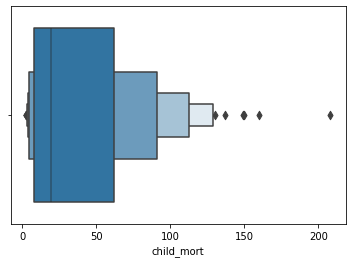

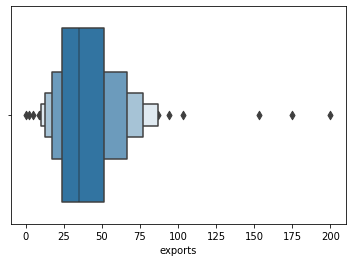

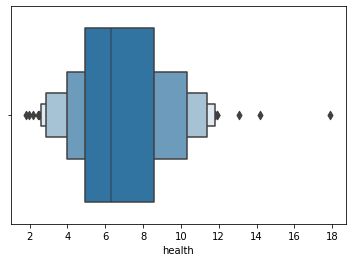

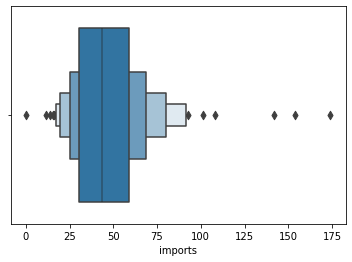

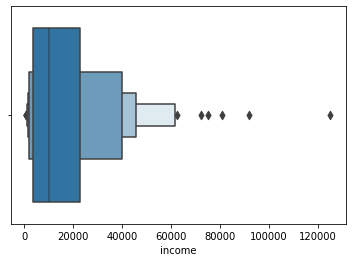

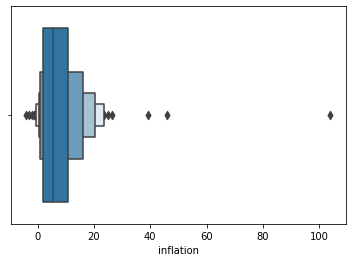

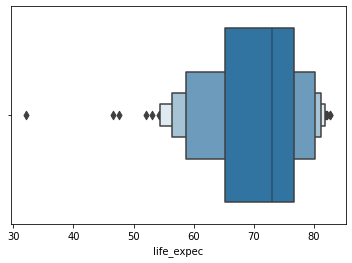

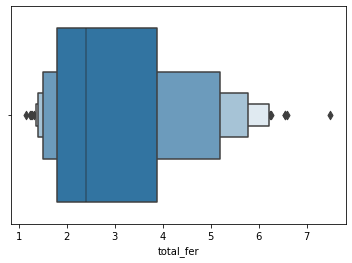

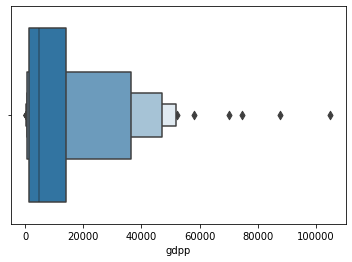

In [13]:
# BoxenPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

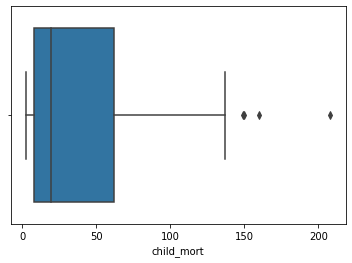

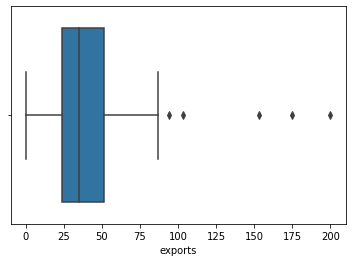

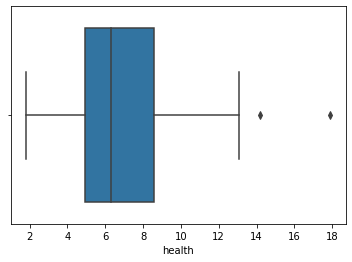

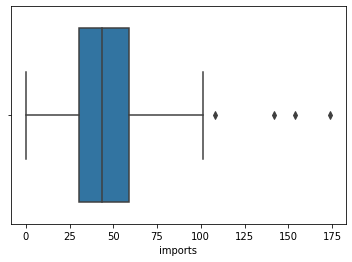

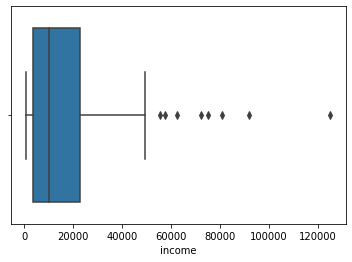

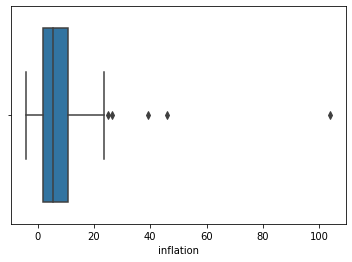

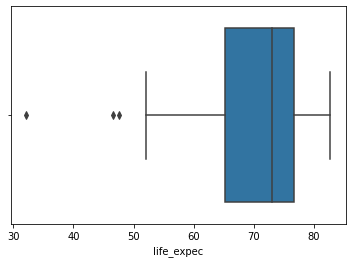

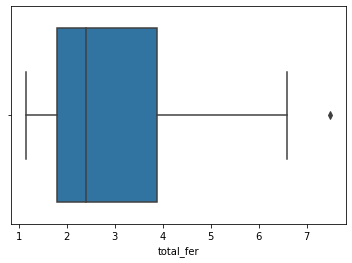

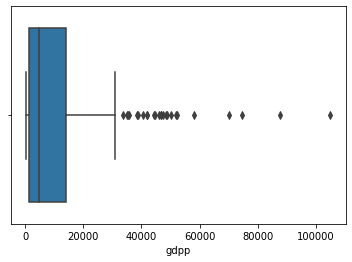

In [14]:
# BoxPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

Multivariant Analysis

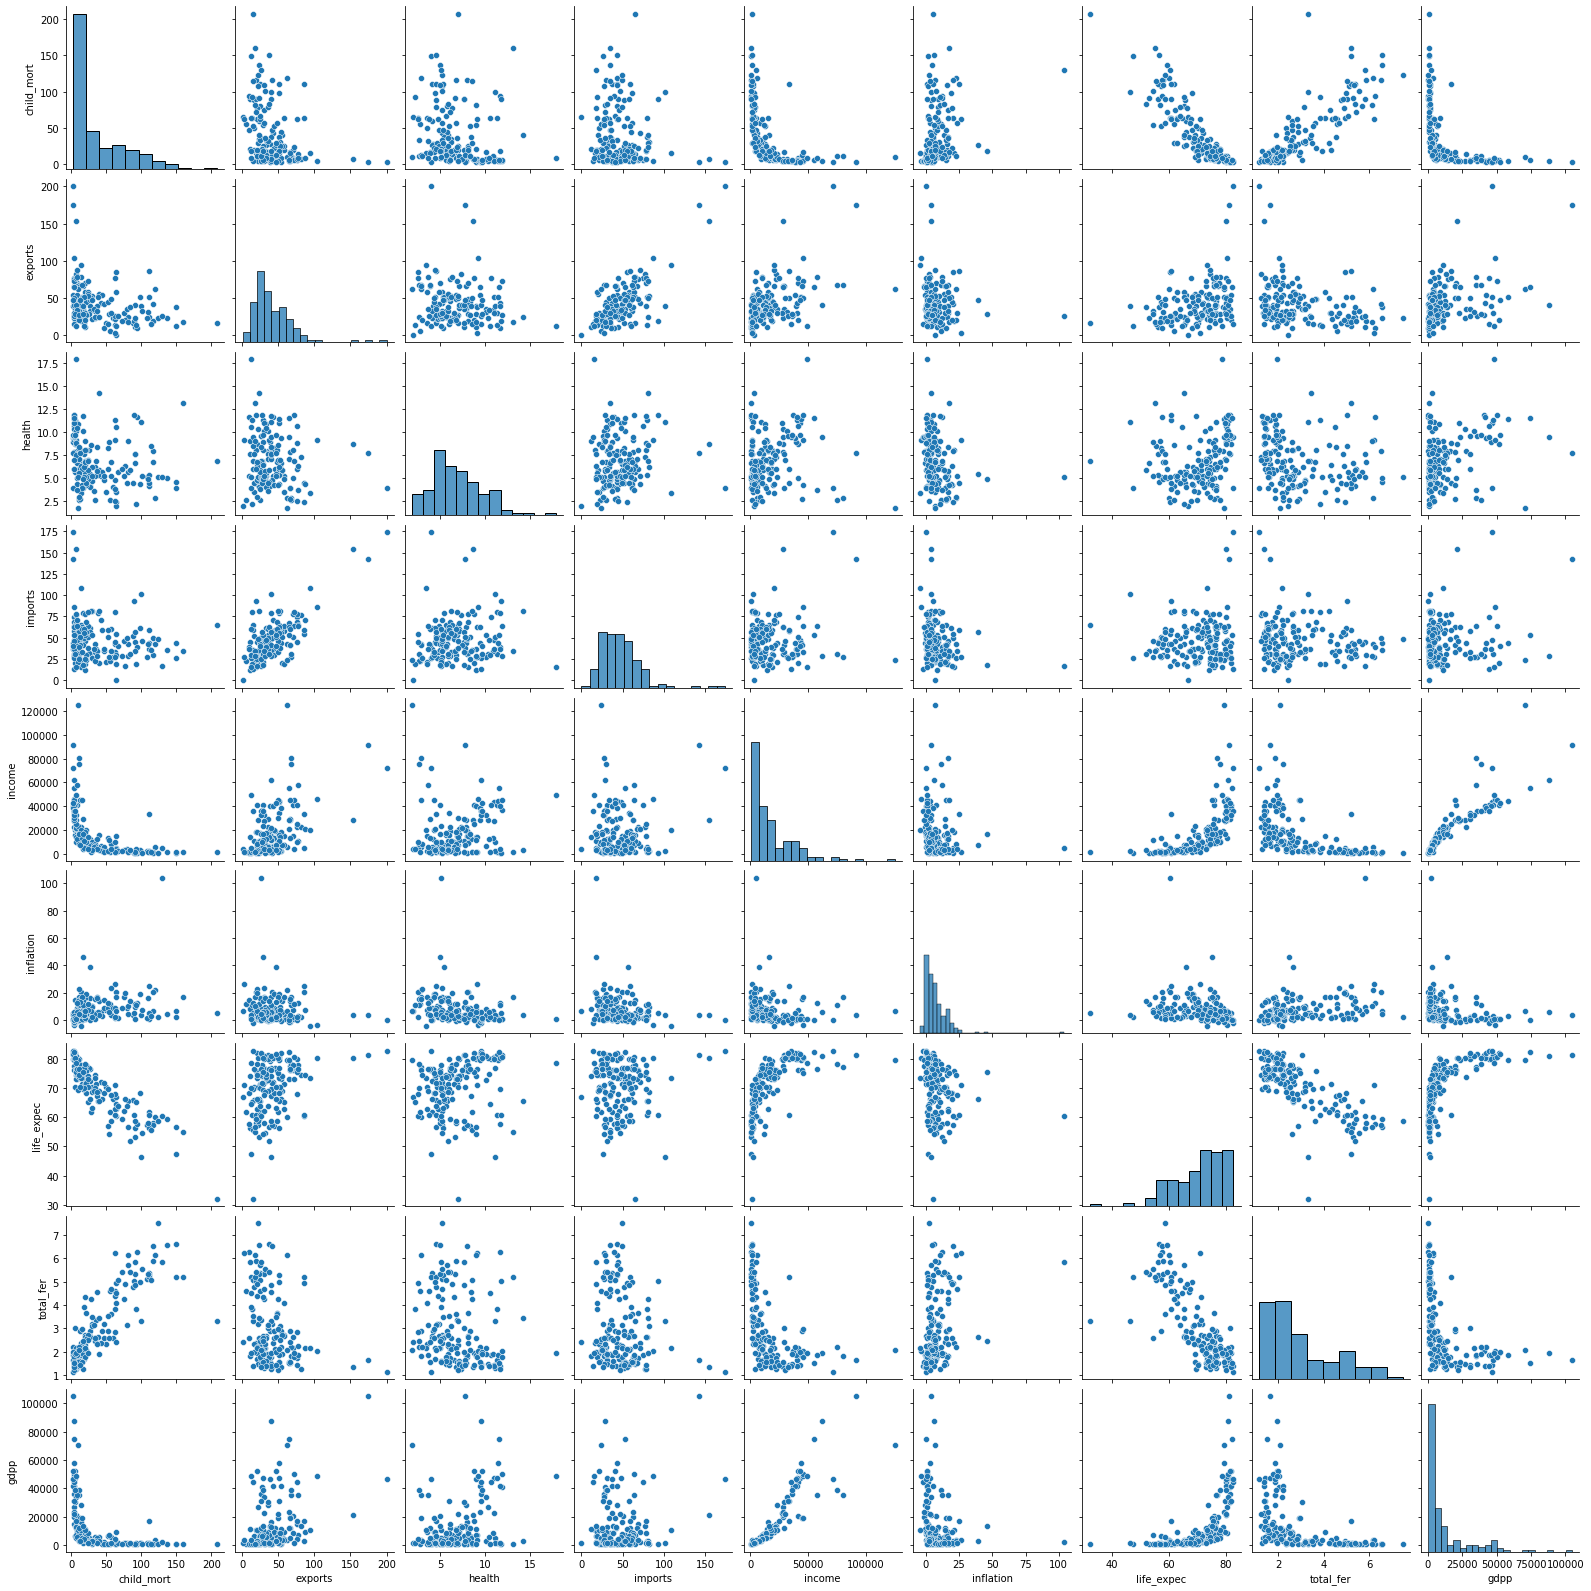

In [15]:
sns.pairplot(data)
plt.show()

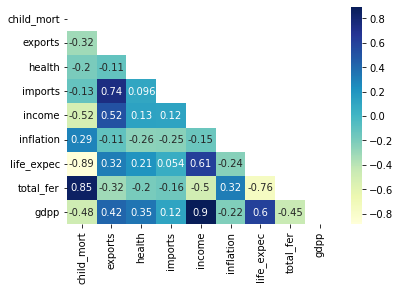

In [16]:
ax = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=np.triu(data.corr()))

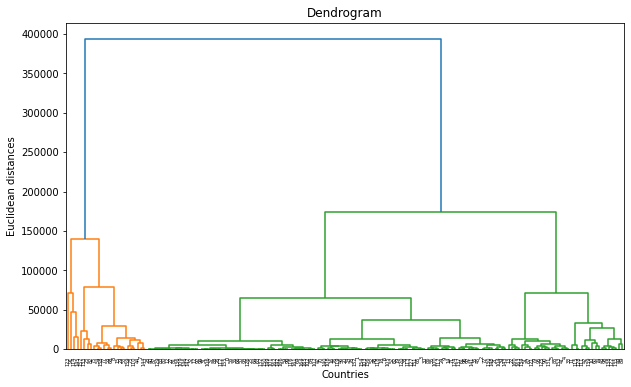

In [17]:
plt.figure(figsize=(10,6)) 
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
dendro = sch.dendrogram(sch.linkage(data.iloc[:,1:], method='ward'))

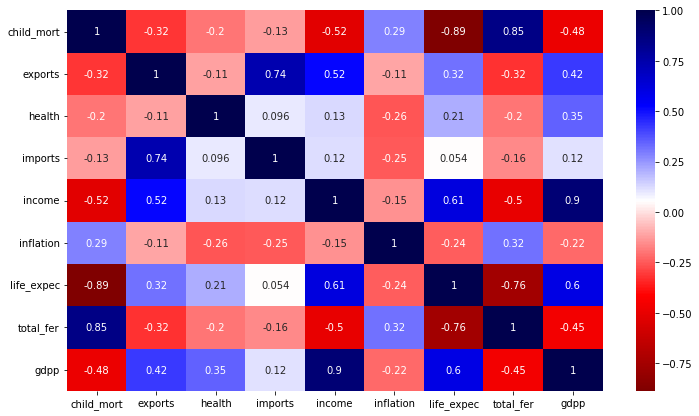

In [18]:
plt.figure(figsize = (12, 7))
sns.heatmap(data.corr(), annot = True, cmap="seismic_r")
plt.show()

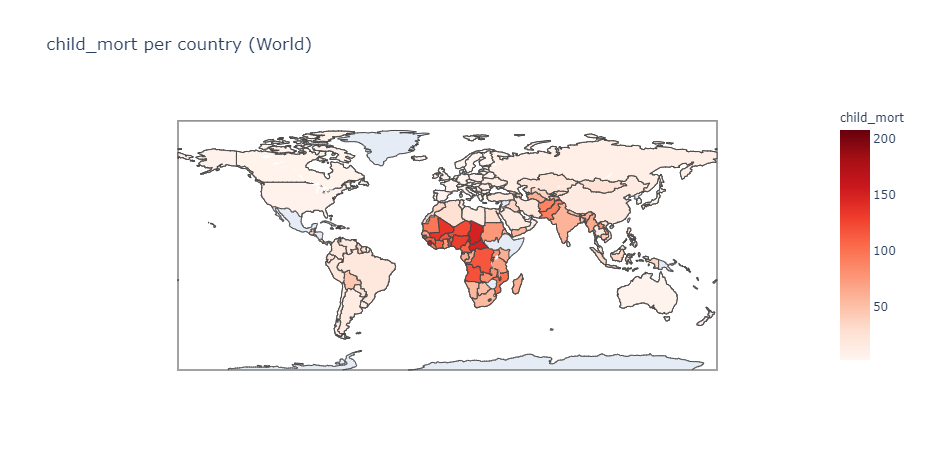

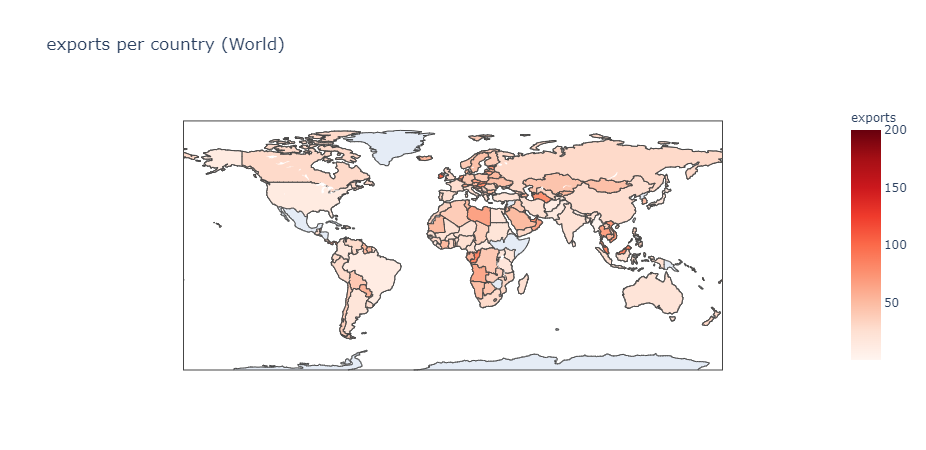

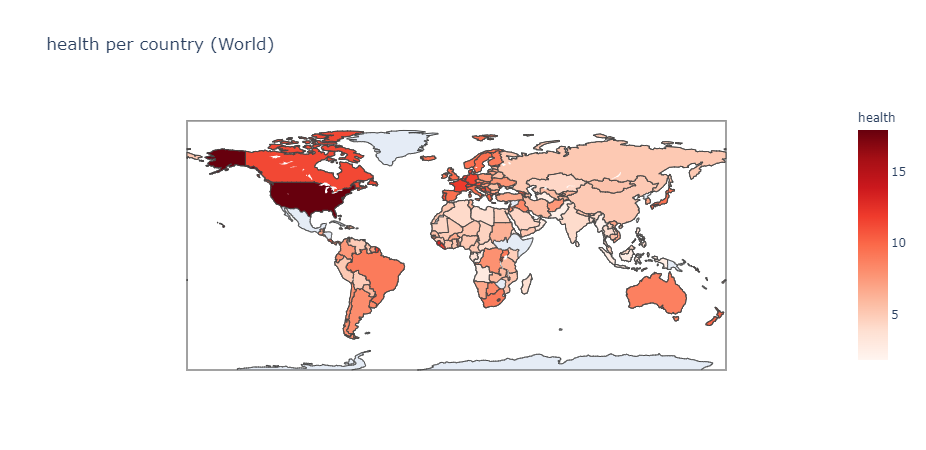

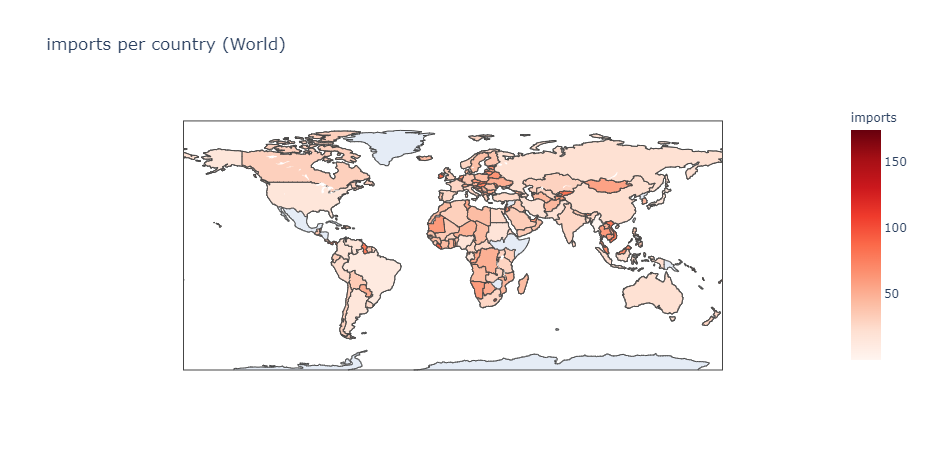

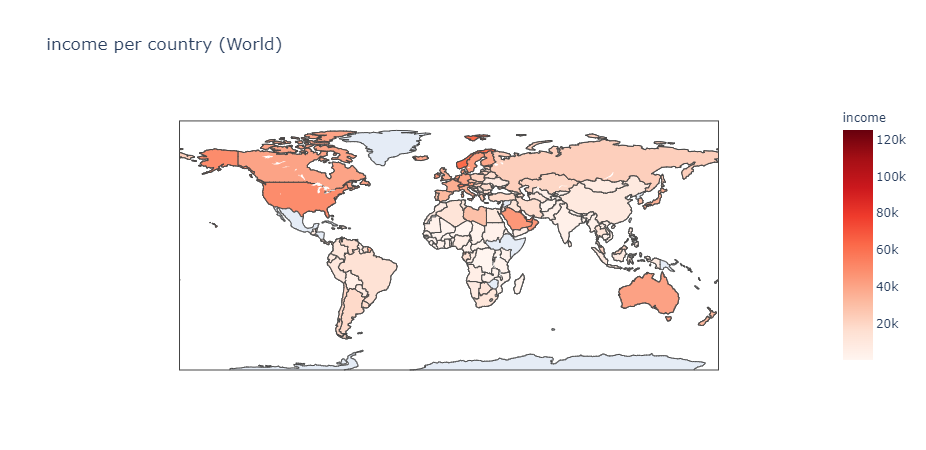

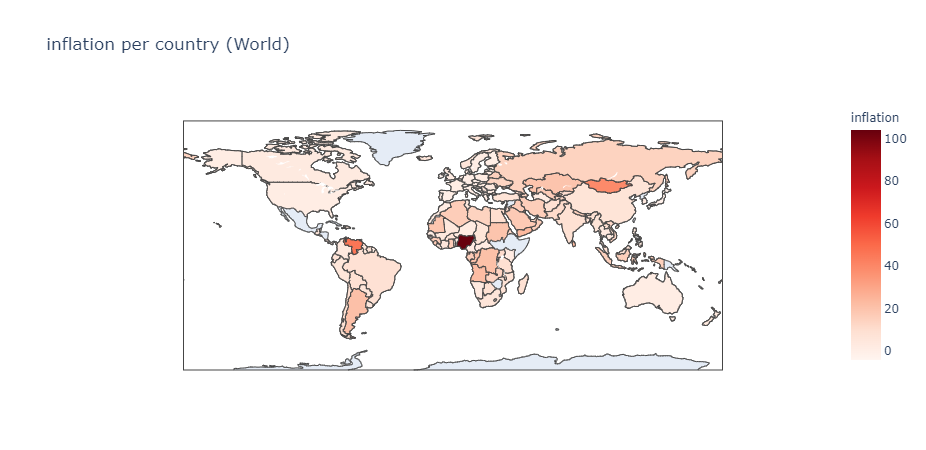

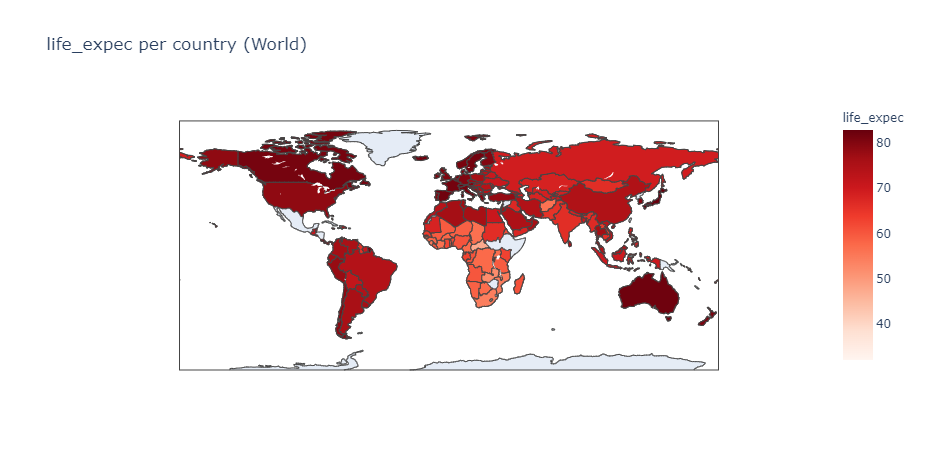

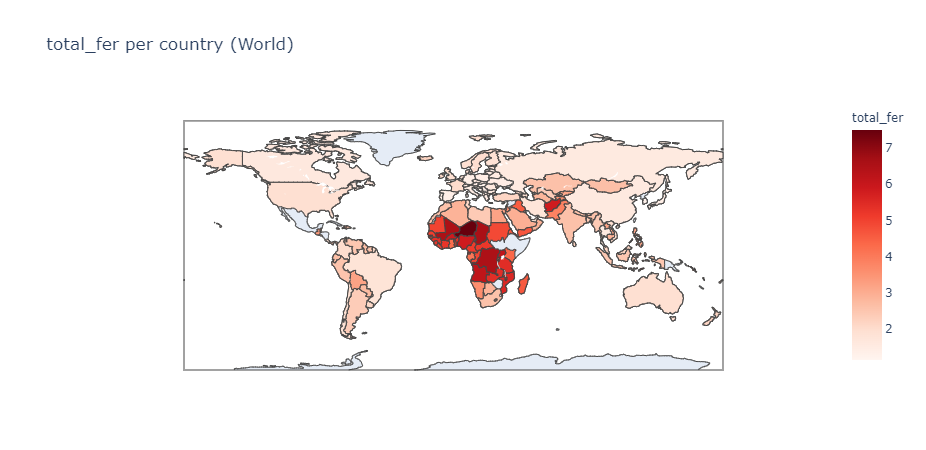

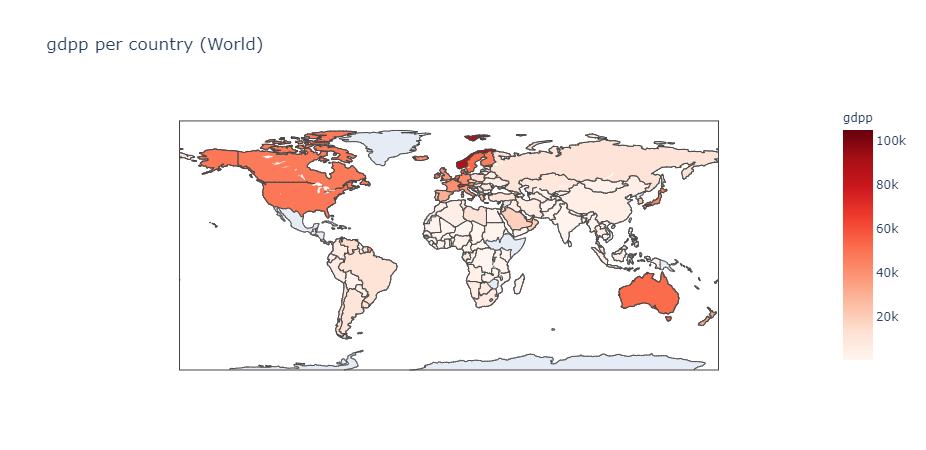

In [19]:
for i in data.drop('country', axis=1).columns:
    fig = px.choropleth(data,locationmode='country names',locations='country',
        title=i+' per country (World)',color=i,color_continuous_scale="Reds")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

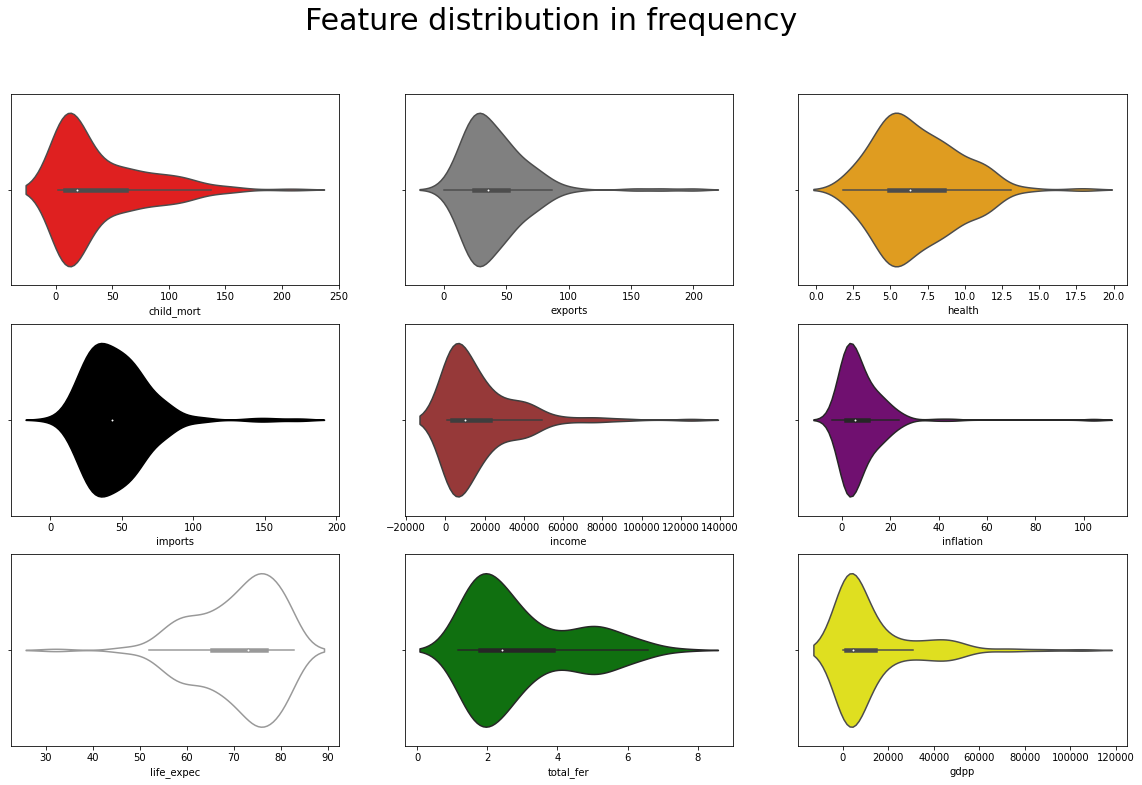

In [20]:
plt.figure(figsize=(20, 12))
plt.suptitle('Feature distribution in frequency',size=30)
plt.subplot(3,3,1)
sns.violinplot(data.child_mort,color='red')
plt.subplot(3,3,2)
sns.violinplot(data.exports,color='grey')
plt.subplot(3,3,3)
sns.violinplot(data.health,color='orange')
plt.subplot(3,3,4)
sns.violinplot(data.imports,color='black')
plt.subplot(3,3,5)
sns.violinplot(data.income,color='brown')
plt.subplot(3,3,6)
sns.violinplot(data.inflation,color='purple')
plt.subplot(3,3,7)
sns.violinplot(data.life_expec,color='white')
plt.subplot(3,3,8)
sns.violinplot(data.total_fer,color='green')
plt.subplot(3,3,9)
sns.violinplot(data.gdpp,color='yellow')
plt.show()

In [21]:
# Function to plot each feature vs country for the three categories - High, Medium and Low

catog = ['High', 'Medium', 'Low']
def plots_catogs(feature, ttl_text, subplt_ttl):
  """
  Arguments:
  feature - Feature/variable considered for plotting (Example - income, gdpp, health, child_mort etc.)
  ttl_text - Main title for the subplots
  This function takes in the feature name as the argument and creates three plots for each High, Medium and Low category for that particular feature passed.
  """
  fig, ax = plt.subplots(1,3,figsize = (17,5))
  sns.barplot(x = 'country', y = feature, data = data.sort_values(by = feature, ascending = False).iloc[:5], ax = ax[0])
  sns.barplot(x = 'country', y = feature, data = data.sort_values(by = feature, ascending = False).iloc[81:86], ax = ax[1])
  sns.barplot(x = 'country', y = feature, data = data.sort_values(by = feature, ascending = False).iloc[-5:], ax = ax[2])
  for i in range(3):
    title = catog[i] + ' ' + subplt_ttl
    ax[i].set_title(title)
    ax[i].tick_params(axis='x', labelrotation = 45)
  fig.suptitle(ttl_text, fontsize = 18)

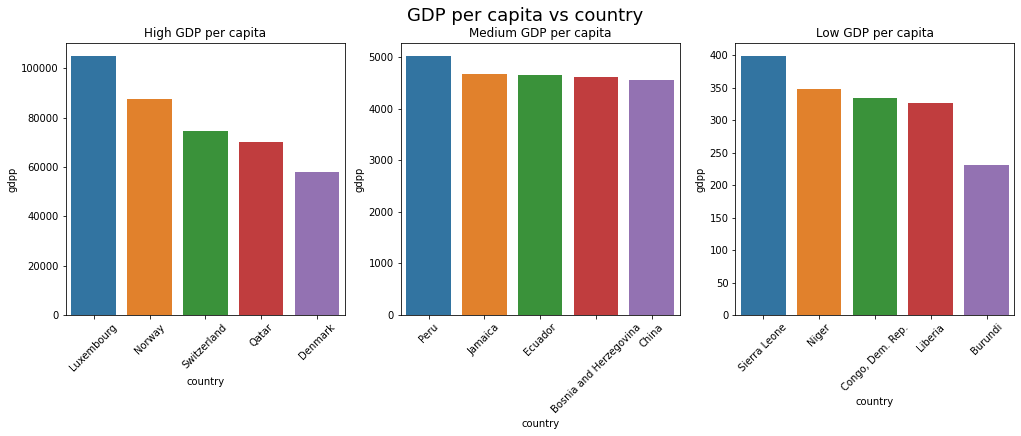

In [22]:
title = 'GDP per capita vs country'
plots_catogs('gdpp', title, 'GDP per capita')
plt.show()

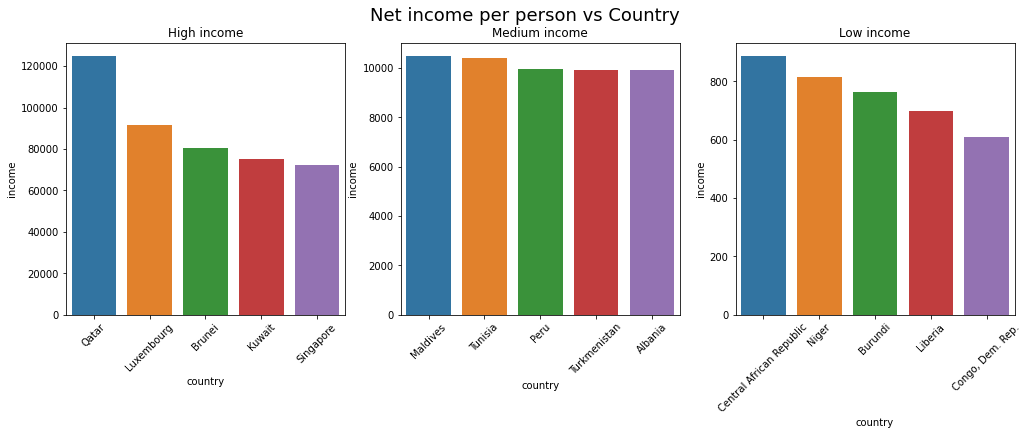

In [23]:
title = 'Net income per person vs Country'
plots_catogs('income', title, 'income')
plt.show()

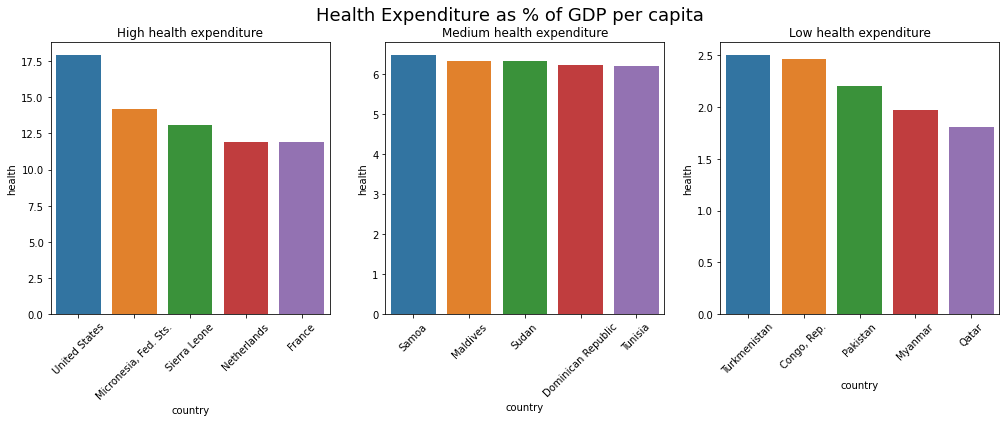

In [24]:
title = 'Health Expenditure as % of GDP per capita'
plots_catogs('health', title, 'health expenditure')
plt.show()

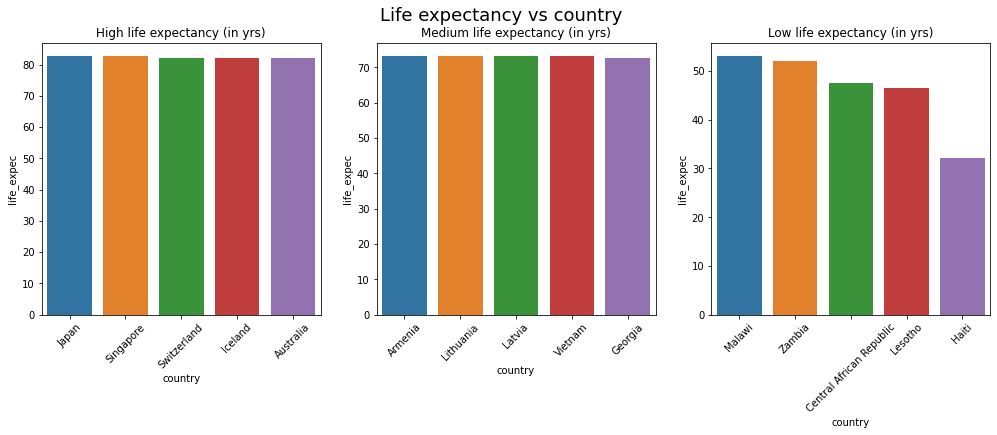

In [25]:
title = 'Life expectancy vs country'
plots_catogs('life_expec', title, 'life expectancy (in yrs)')
plt.show()

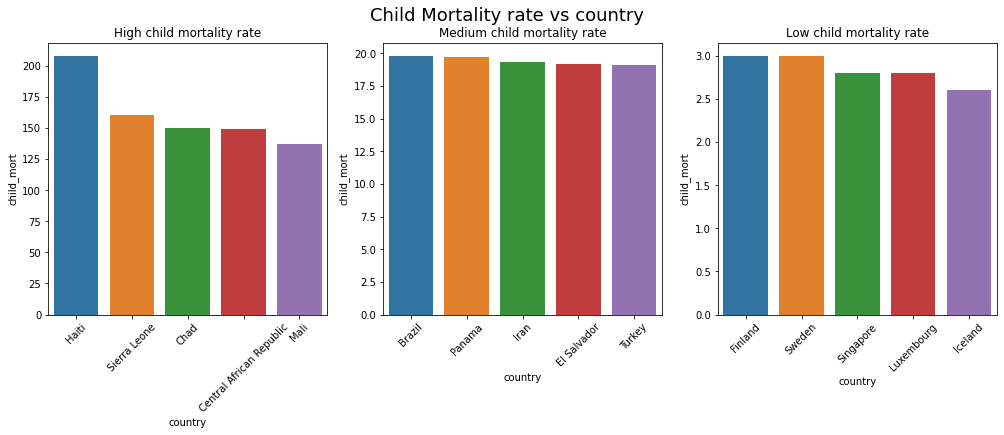

In [26]:
title = 'Child Mortality rate vs country'
plots_catogs('child_mort', title, 'child mortality rate')
plt.show()

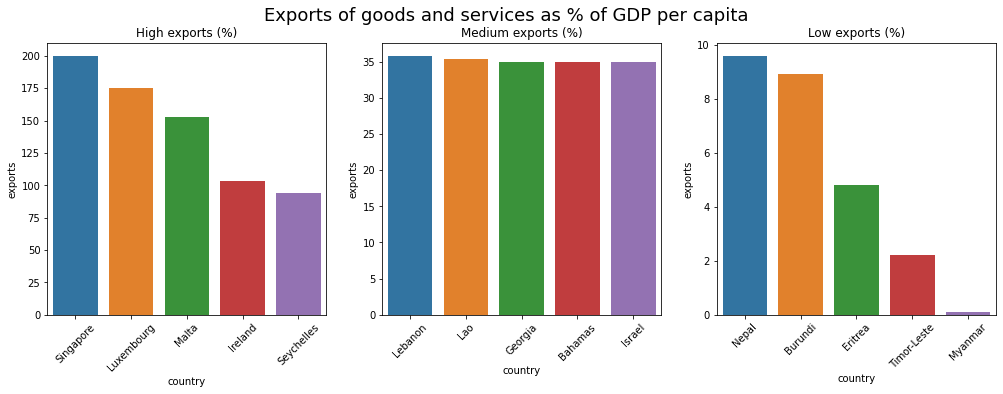

In [27]:
title = 'Exports of goods and services as % of GDP per capita'
plots_catogs('exports', title, 'exports (%)')
plt.show()

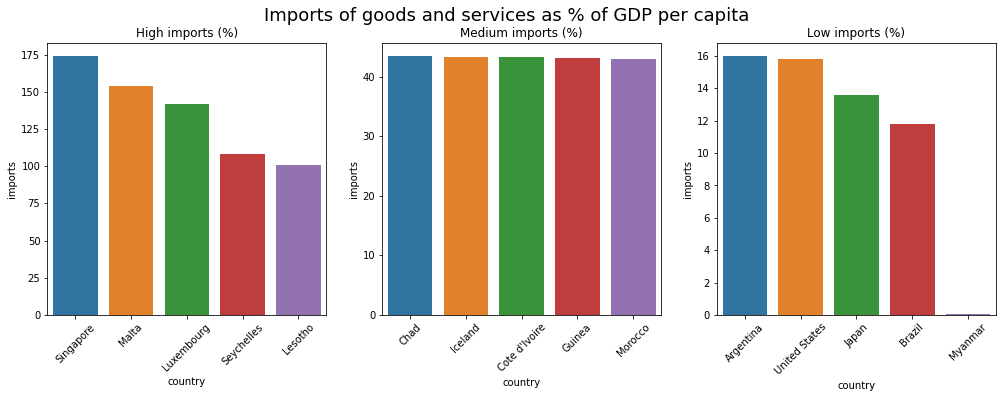

In [28]:
title = 'Imports of goods and services as % of GDP per capita'
plots_catogs('imports', title, 'imports (%)')
plt.show()

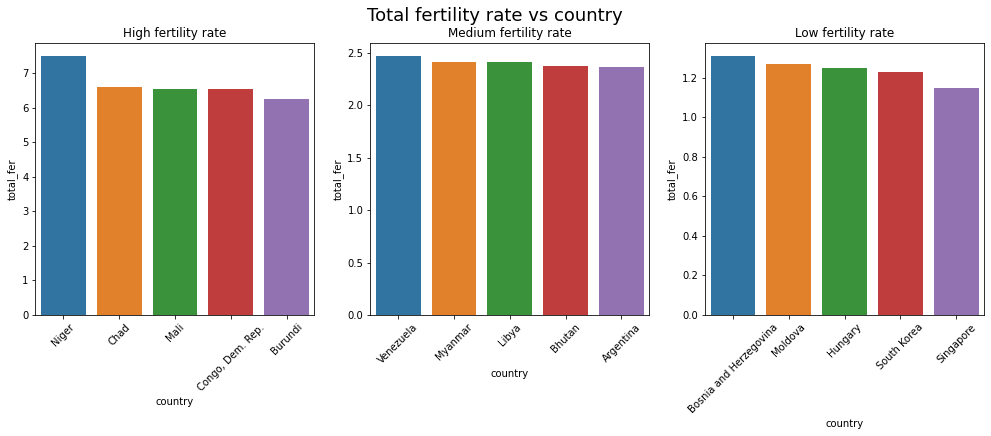

In [29]:
title = 'Total fertility rate vs country'
plots_catogs('total_fer', title, 'fertility rate')
plt.show()

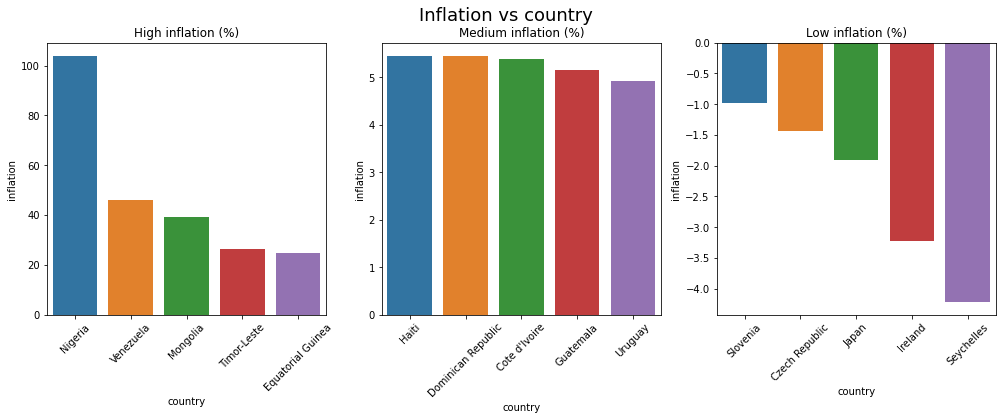

In [30]:
title = 'Inflation vs country'
plots_catogs('inflation', title, 'inflation (%)')
plt.show()

**EDA Summary**

1. Singapore, Malta and Luxembourg are in the top 5 countries for Imports and Exports of goods and services.
2. Majority of countries having high child mortality and fertility rates come from Africa.
3. In addition, Singapore lies in the bottom for child mortality and fertility, which could indicate better healthcare infrastructure and government policies.
4. In healthcare spending, United States leads with 18% of its GDP set aside for the same. On the other hand, countries in Asia/Middle East have spent only a maximum of 2.5% of their GDP towards healthcare.
5. European and Asian countries like Japan and Singapore are in the top 5 for life expectancy, with it being approximately 80yrs. However, African countries and Haiti are at the bottom extreme.
6. In GDP per capita growth rates, majority of the countries at the top end are in Europe with Luxembourg leading at USD120000. Qatar is only Asian country in this list.

# Feature Transformation

Outlier Detection

In [31]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

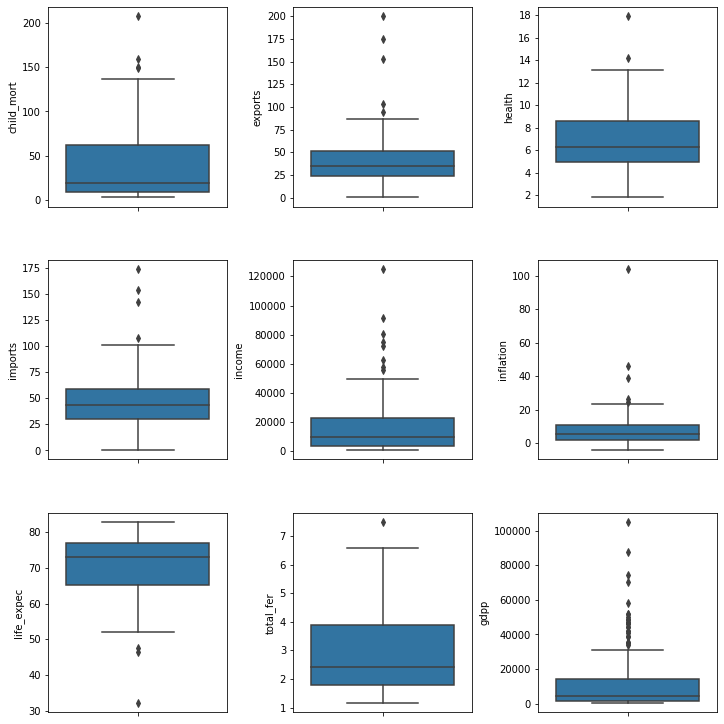

In [32]:
data1 = data.drop(columns=['country'], axis=1)

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

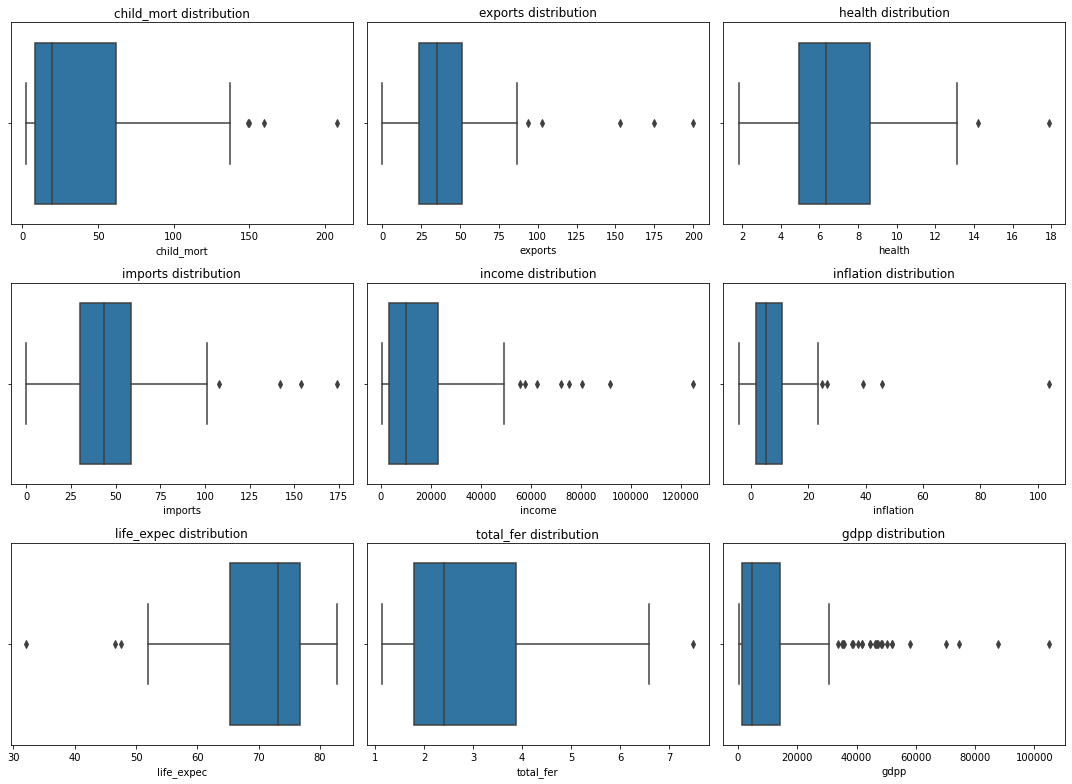

In [33]:
# boxplots
numerical_cols = data.columns[1:]
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,11))
for i in range(len(numerical_cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[numerical_cols[i]])
    title = numerical_cols[i] + ' distribution'
    plt.title(title)
plt.tight_layout()
plt.show()

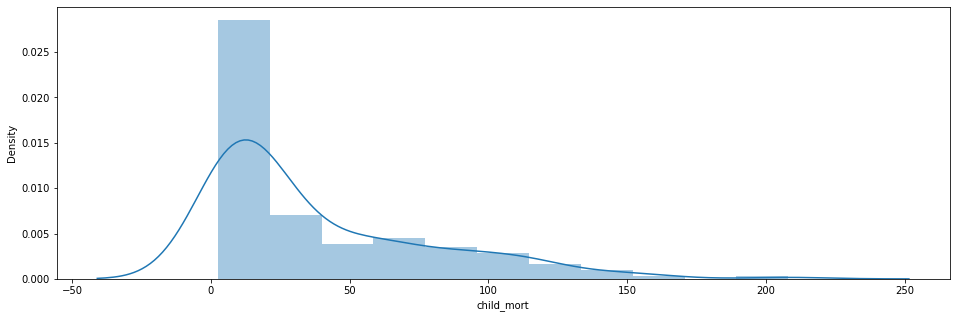

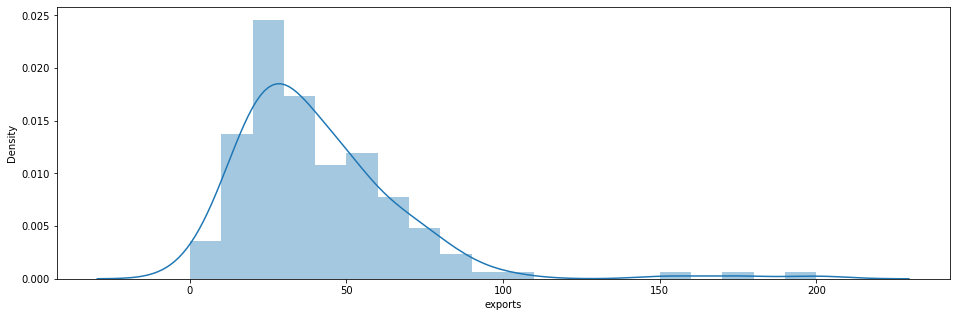

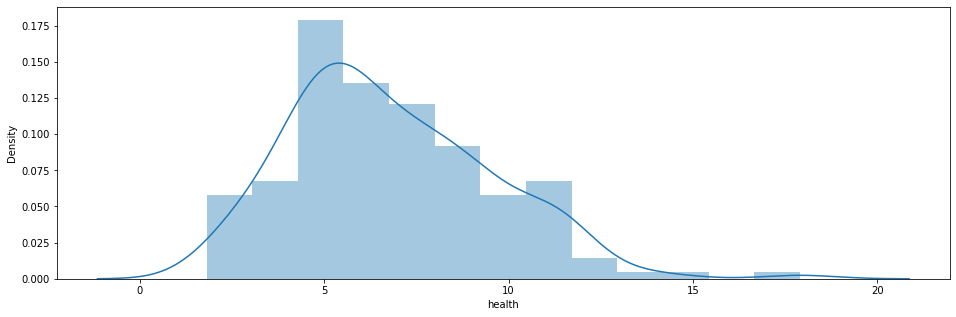

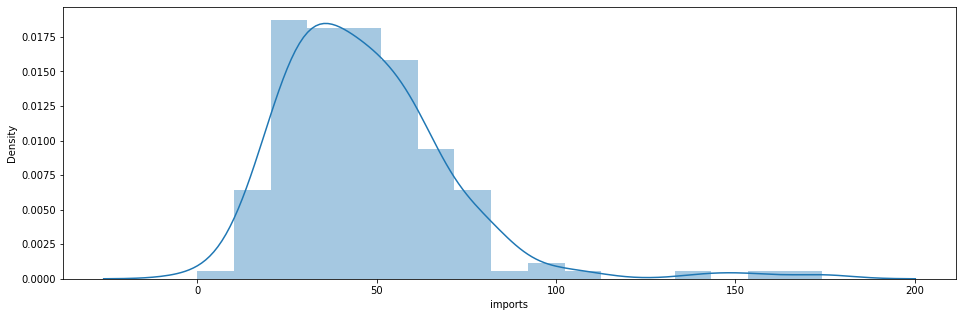

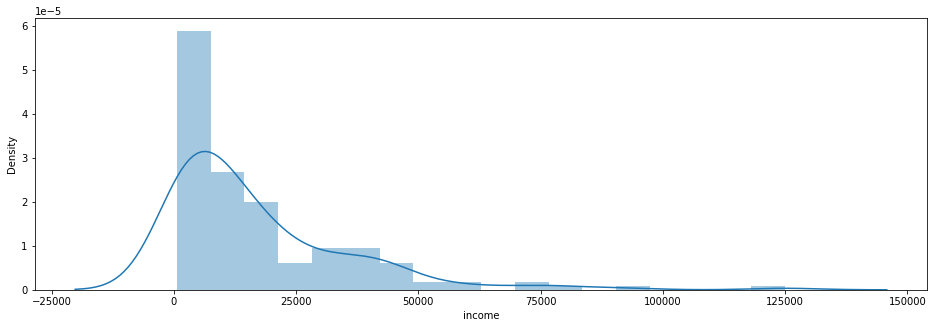

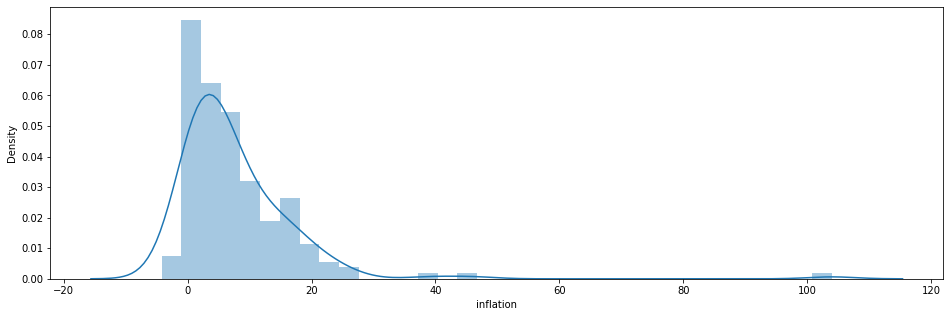

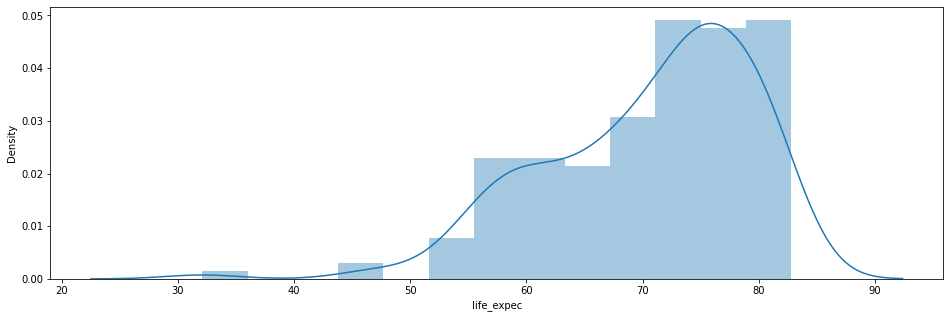

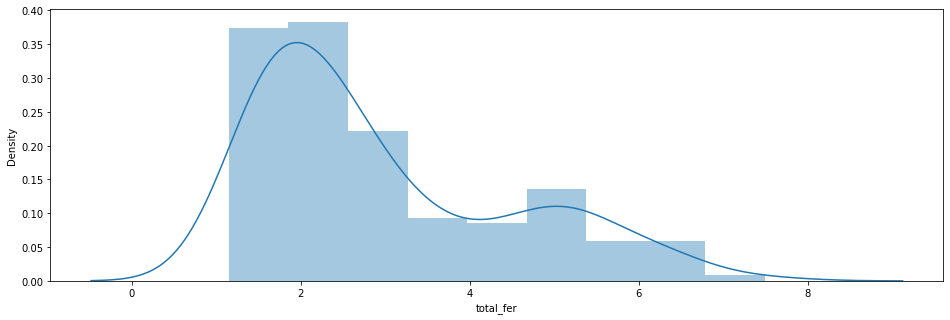

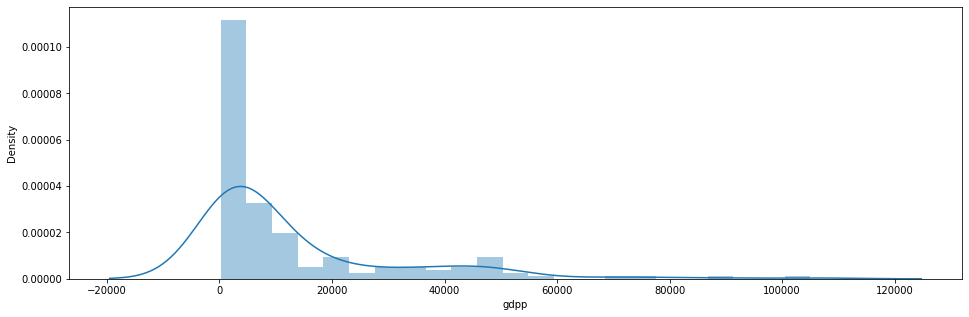

In [34]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(data[data.columns[i]])
        plt.show()

In [35]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        print(f'{data.columns[i]} : {data[data.columns[i]].skew()}')

child_mort : 1.4507735387555047

exports : 2.4458240051613496

health : 0.7057460547100981

imports : 1.90527571988626

income : 2.231479607767527

inflation : 5.154049359697971

life_expec : -0.9709955819991258

total_fer : 0.9670916808050207

gdpp : 2.2180514519497163


In [36]:
# CAPPING OUTLIERS

# percentile25 = train["colnames"].quantile(0.25)
# percentile75 = train["colnames"].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

def outlier_removal(column_name):
    upper_limit, lower_limit = column_name.quantile(0.75) + 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25)), column_name.quantile(0.75) - 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25))
    
    column_name = np.where(column_name > upper_limit,upper_limit,
                                              np.where(column_name < lower_limit,lower_limit,
                                              column_name))
    return column_name

In [37]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        data[data.columns[i]] = outlier_removal(data[data.columns[i]])

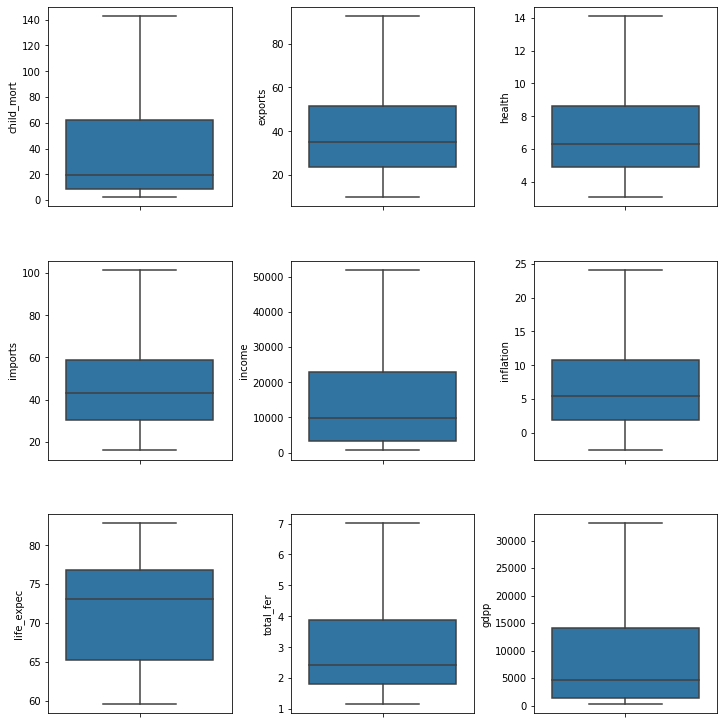

In [38]:
data1 = data.drop(columns=['country'], axis=1)

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

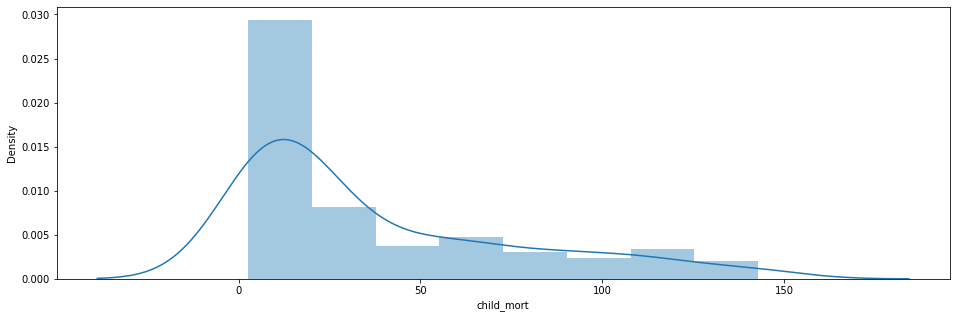

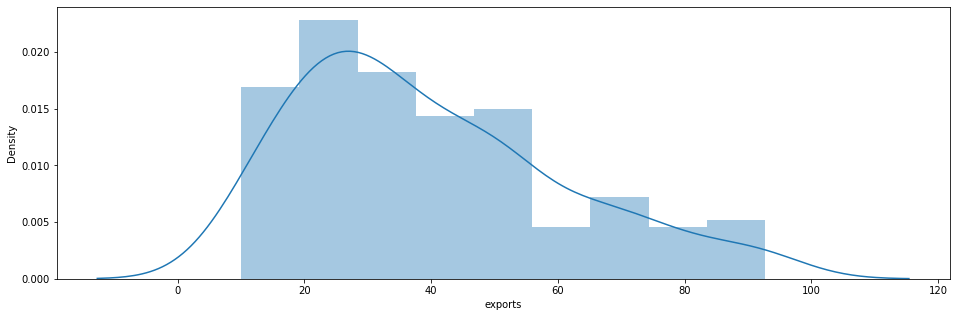

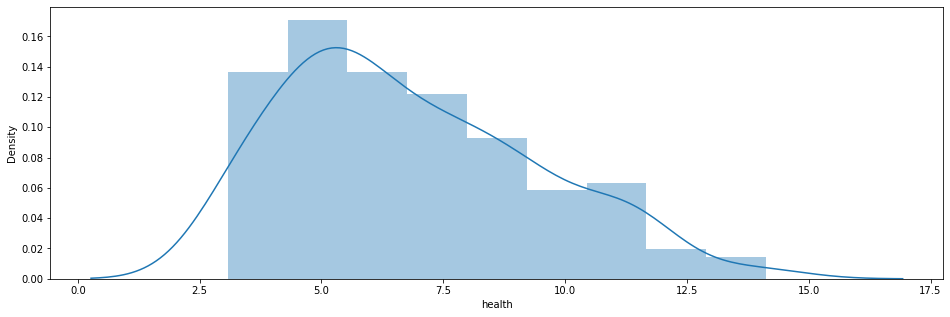

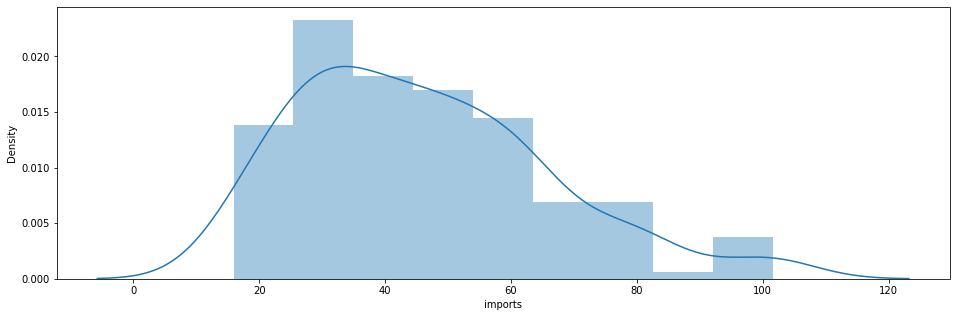

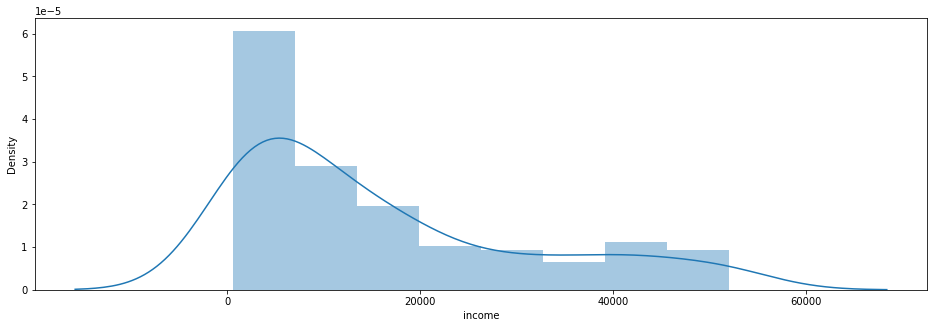

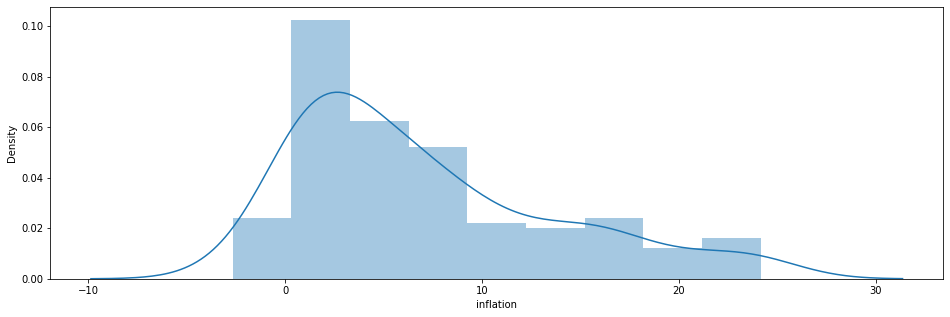

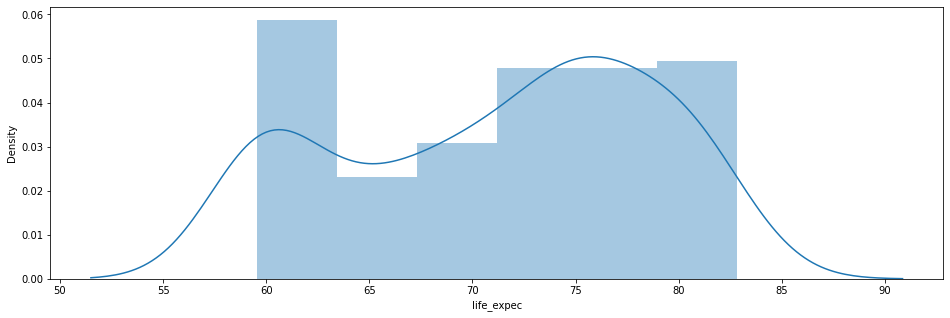

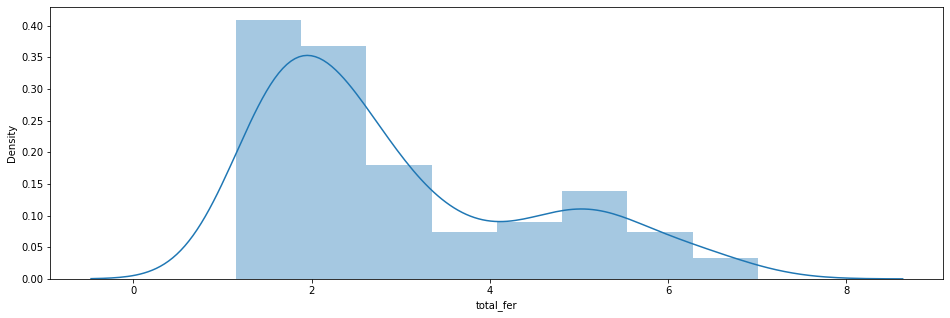

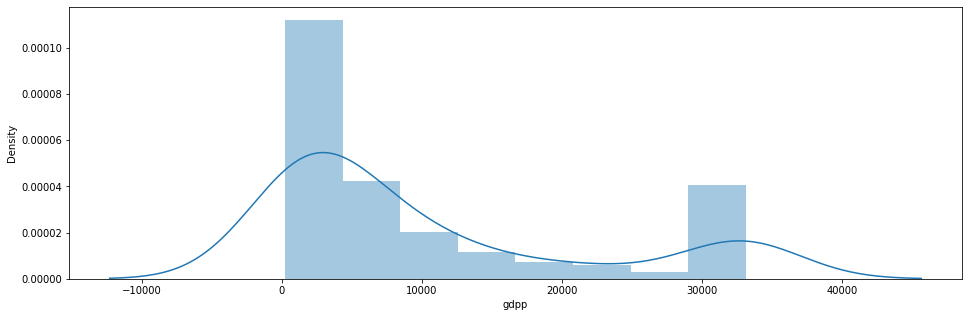

In [39]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(data[data.columns[i]])
        plt.show()

In [40]:
data.shape

(167, 10)

Feature Scaling - Normalization

In [41]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data.iloc[:,1:])

In [42]:
data_scaled

array([[ 1.36980194, -1.41232542,  0.28770262, ..., -1.568603  ,
         1.91527602, -0.84634107],
       [-0.55046422, -0.55656737, -0.10889722, ...,  0.68113409,
        -0.86277926, -0.54082746],
       [-0.27129509, -0.06144171, -1.02531239, ...,  0.70799663,
        -0.03669088, -0.50886816],
       ...,
       [-0.37565738,  1.53819504,  0.00276681, ...,  0.25133357,
        -0.66291917, -0.78095407],
       [ 0.48533152, -0.46135089, -0.63641351, ..., -0.50081733,
         1.14914567, -0.78095407],
       [ 1.18455887, -0.12809324, -0.36302916, ..., -1.568603  ,
         1.63547189, -0.7679976 ]])

In [43]:
data_scaled = pd.DataFrame(data_scaled, columns = data.columns[1:])
data_scaled

child_mort   exports    health   imports    income  inflation  \
0      1.369802 -1.412325  0.287703 -0.054719 -0.943936   0.354422   
1     -0.550464 -0.556567 -0.108897  0.129938 -0.395181  -0.388239   
2     -0.271295 -0.061442 -1.025312 -0.728466 -0.199291   1.353638   
3      2.121210  1.076395 -1.445015 -0.154533 -0.660984   2.298842   
4     -0.714835  0.276577 -0.309122  0.643982  0.209637  -0.845838   
..          ...       ...       ...       ...       ...        ...   
162   -0.221723  0.328946 -0.609460  0.334558 -0.855555  -0.668800   
163   -0.537419 -0.532763 -0.740377 -1.417186  0.038151   2.562899   
164   -0.375657  1.538195  0.002767  1.707006 -0.753982   0.753508   
165    0.485332 -0.461351 -0.636414 -0.578744 -0.754642   2.478881   
166    1.184559 -0.128093 -0.363029 -0.753420 -0.833789   1.038569   

     life_expec  total_fer      gdpp  
0     -1.568603   1.915276 -0.846341  
1      0.681134  -0.862779 -0.540827  
2      0.707997  -0.036691 -0.508868  
3     -1.494731   2.141784 -0.589198  
4      0.748290  -0.543003  0.159686  
..          ...        ...       ...  
162   -1.105224   0.369691 -0.637569  
163    0.560253  -0.316495  0.271975  
164    0.251334  -0.662919 -0.780954  
165   -0.500817   1.149146 -0.780954  
166   -1.568603   1.635472 -0.767998  

[167 rows x 9 columns]

In [44]:
data_scaled.insert(loc = 0, column = 'country', value = data.country)
data_scaled

country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.369802 -1.412325  0.287703 -0.054719 -0.943936   
1                Albania   -0.550464 -0.556567 -0.108897  0.129938 -0.395181   
2                Algeria   -0.271295 -0.061442 -1.025312 -0.728466 -0.199291   
3                 Angola    2.121210  1.076395 -1.445015 -0.154533 -0.660984   
4    Antigua and Barbuda   -0.714835  0.276577 -0.309122  0.643982  0.209637   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.221723  0.328946 -0.609460  0.334558 -0.855555   
163            Venezuela   -0.537419 -0.532763 -0.740377 -1.417186  0.038151   
164              Vietnam   -0.375657  1.538195  0.002767  1.707006 -0.753982   
165                Yemen    0.485332 -0.461351 -0.636414 -0.578744 -0.754642   
166               Zambia    1.184559 -0.128093 -0.363029 -0.753420 -0.833789   

     inflation  life_expec  total_fer      gdpp  
0     0.354422   -1.568603   1.915276 -0.846341  
1    -0.388239    0.681134  -0.862779 -0.540827  
2     1.353638    0.707997  -0.036691 -0.508868  
3     2.298842   -1.494731   2.141784 -0.589198  
4    -0.845838    0.748290  -0.543003  0.159686  
..         ...         ...        ...       ...  
162  -0.668800   -1.105224   0.369691 -0.637569  
163   2.562899    0.560253  -0.316495  0.271975  
164   0.753508    0.251334  -0.662919 -0.780954  
165   2.478881   -0.500817   1.149146 -0.780954  
166   1.038569   -1.568603   1.635472 -0.767998  

[167 rows x 10 columns]

In [45]:
pca = PCA(n_components=3)
components = pca.fit_transform(data_scaled.iloc[:,1:])
pca_data = pd.DataFrame(data=components,
                    columns=['component 1', 'component 2', 'component 3'])

In [46]:
pca_data.head()

component 1  component 2  component 3
0    -3.117959    -0.404376    -0.962945
1     0.439468    -0.223769    -0.324731
2    -0.422408    -0.486851     1.668065
3    -3.423620     1.200784     2.045967
4     1.257142     0.558347    -0.199150

# Model Building

**KMeans Clustering**

**Silhouette Coefficient or silhouette score** is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.

In [47]:
SSE = []
wss = []

sil_score = []

k = range(1, 10)

for i in k:
    kmeanModel = KMeans(n_clusters = i, init = "k-means++", random_state = 101).fit(pca_data)
    kmeanModel.fit(pca_data)
    SSE.append(kmeanModel.inertia_)
    wss.append([i, kmeanModel.inertia_])

    if i > 1: 
        labels = kmeanModel.labels_
        score = metrics.silhouette_score(pca_data, labels, metric="euclidean", random_state=101)
        sil_score.append(score)

        print(f"Silhouette score for cluster-{i} = {score}")
print(wss)

Silhouette score for cluster-2 = 0.35056719696508654

Silhouette score for cluster-3 = 0.2871036380482729

Silhouette score for cluster-4 = 0.29856326009391354

Silhouette score for cluster-5 = 0.3130227704033834

Silhouette score for cluster-6 = 0.3106070652299206

Silhouette score for cluster-7 = 0.3358454641674526

Silhouette score for cluster-8 = 0.3136492892596942

Silhouette score for cluster-9 = 0.31977048360324645

[[1, 1195.0232647663724], [2, 680.2288280359573], [3, 535.7739196811098], [4, 433.59185132860176], [5, 358.3514134961918], [6, 312.1797425531469], [7, 267.33313296606866], [8, 240.02783232518303], [9, 215.07514999311636]]


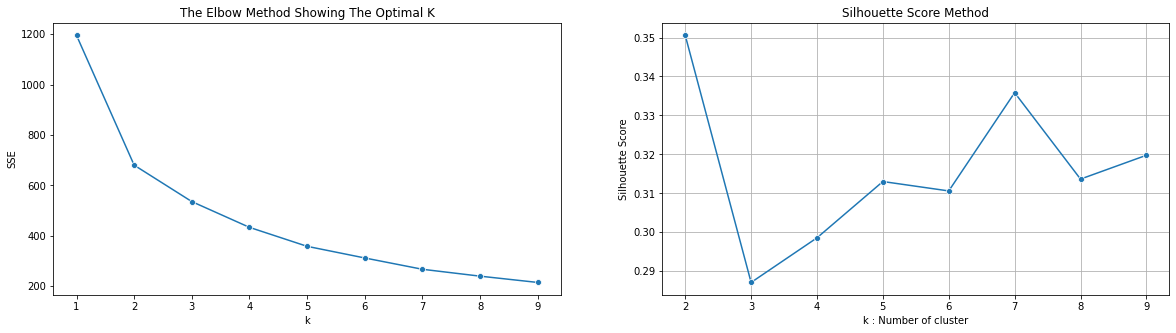

In [48]:
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5))

plt.subplot(1,2,1)
sns.lineplot(k, SSE, marker="o")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("The Elbow Method Showing The Optimal K")

plt.subplot(1,2,2)
sns.lineplot(x = range(2,9 + 1), y = sil_score, marker="o");
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

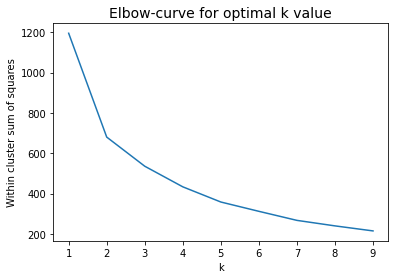

In [78]:
wss = pd.DataFrame(wss, columns = ['k', 'WSS'])

sns.lineplot(x = 'k', y = 'WSS', data = wss)
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow-curve for optimal k value', fontsize = 14)
plt.show()

At k=3, an elbow shape can be identified. The slope of the curve changes rapidly from k=3. Therefore, k=3 is selected as the optimum value for the number of clusters.

In [79]:
model = KMeans(n_clusters = 3)

model.fit(pca_data)
pred = model.predict(pca_data)

In [80]:
pred

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2,
       2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2,
       0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [81]:
# Adding the cluster labels column to the original data
data['cluster'] = pred
data.reset_index(drop = True, inplace = True)
data.head()

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2   10.025    7.58     44.9   1610.0   
1              Albania        16.6   28.000    6.55     48.6   9930.0   
2              Algeria        27.3   38.400    4.17     31.4  12900.0   
3               Angola       119.0   62.300    3.08     42.9   5900.0   
4  Antigua and Barbuda        10.3   45.500    6.03     58.9  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster  
0       9.44       59.55       5.82    553.0        2  
1       4.49       76.30       1.65   4090.0        1  
2      16.10       76.50       2.89   4460.0        1  
3      22.40       60.10       6.16   3530.0        2  
4       1.44       76.80       2.13  12200.0        0

In [82]:
data.cluster.value_counts()

1    71
0    51
2    45
Name: cluster, dtype: int64

In [83]:
#mean values of all features for each cluster

averages_of_all = pd.DataFrame(data.groupby('cluster').agg({'gdpp':'mean', 'income':'mean', 'inflation':'mean', 'exports':'mean', 'imports':'mean',\
                                     'health':'mean', 'child_mort':'mean', 'life_expec':'mean', 'total_fer':'mean'}))

display(averages_of_all.sort_values(by = ['child_mort', 'total_fer', 'health', 'life_expec', 'income'],\
                                    ascending = [False, False, True, True, True]))

gdpp        income  inflation    exports    imports  \
cluster                                                                
2          996.666667   2265.844444   9.987444  25.310000  41.687222   
1         5772.309859  11895.492958   8.684380  40.325352  45.445423   
0        24980.000000  33575.686275   2.273529  51.495588  50.565686   

           health  child_mort  life_expec  total_fer  
cluster                                               
2        6.230222   91.611111   62.121111   4.957944  
1        6.079296   26.064789   71.462676   2.530423  
0        8.413529    6.323529   78.939216   1.746275

Therefore we can conclude that Cluster 2 is going to be the target group of countries who are require the financial aid.

Cluster 2 -> Require financial aid

Cluster 1 -> May require financial aid

Cluster 0 -> Do not require financial aid

In [94]:
centroids = np.array(model.cluster_centers_)
labels = model.labels_

In [95]:
centroids

array([[ 2.52152577, -0.08794435, -0.19796478],
       [-0.11842718,  0.09691366,  0.30771745],
       [-2.67087744, -0.05323796, -0.26114966]])

In [96]:
labels

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2,
       2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2,
       0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

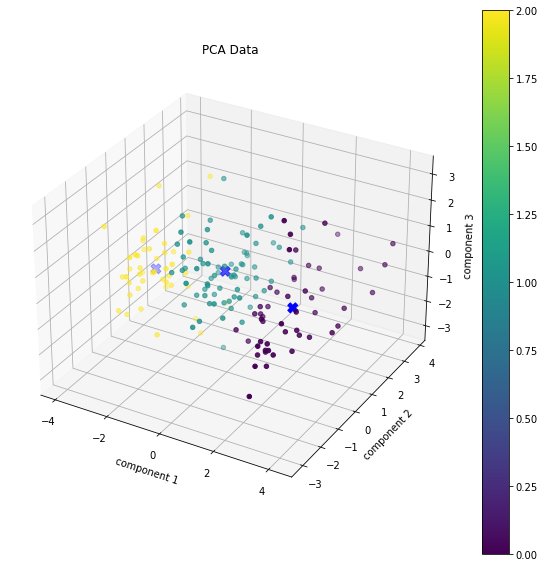

In [97]:
x = pca_data['component 1'].values
y = pca_data['component 2'].values
z = pca_data['component 3'].values


fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='b', s=100)
fg = ax.scatter3D(x, y, z, c = labels, cmap = "viridis")
plt.title("PCA Data")
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.colorbar(fg)

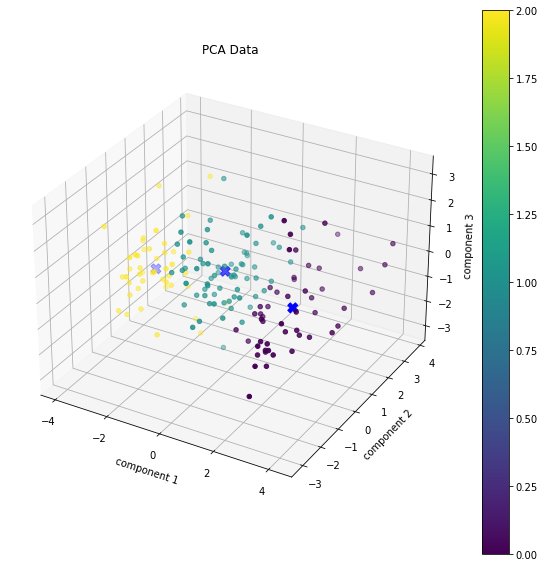

In [98]:
x = pca_data['component 1'].values
y = pca_data['component 2'].values
z = pca_data['component 3'].values

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='b', s=100)
fg = ax.scatter3D(x, y, z, c = labels, cmap = "viridis")
plt.title("PCA Data")
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.colorbar(fg)

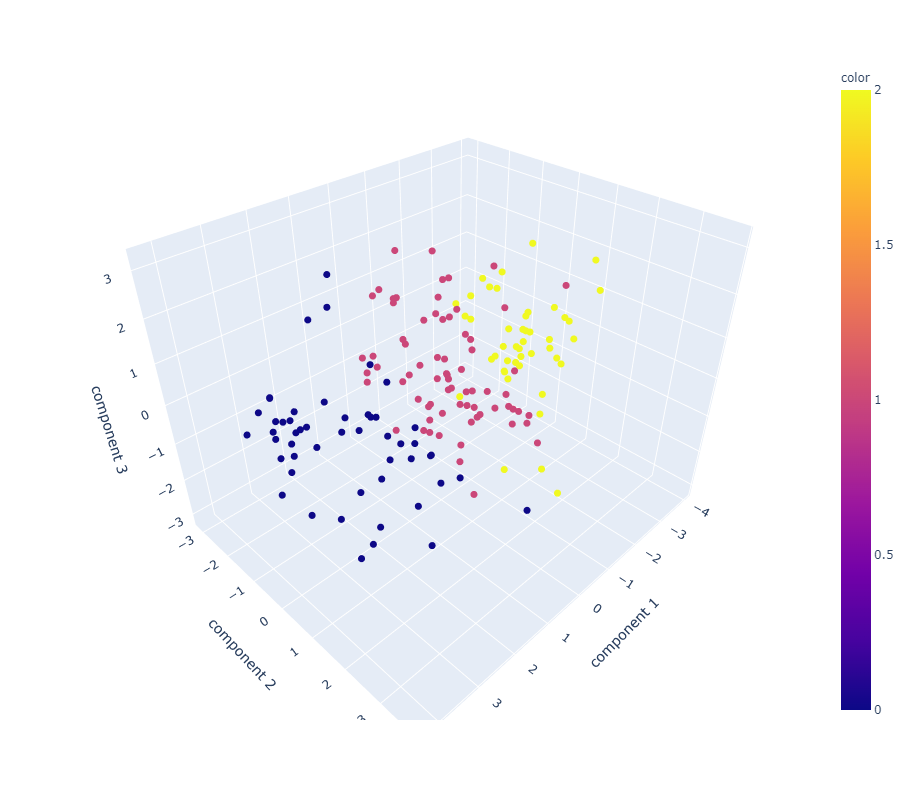

In [99]:
px.scatter_3d(centroids[:, 0], centroids[:, 1], centroids[:, 2], symbol=["x", "x", "x"], color=["black", "black", "black"])
fig = px.scatter_3d(pca_data, x='component 1', y='component 2', z='component 3', color=labels, size_max=0.1)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.update_traces(marker={'size': 4})

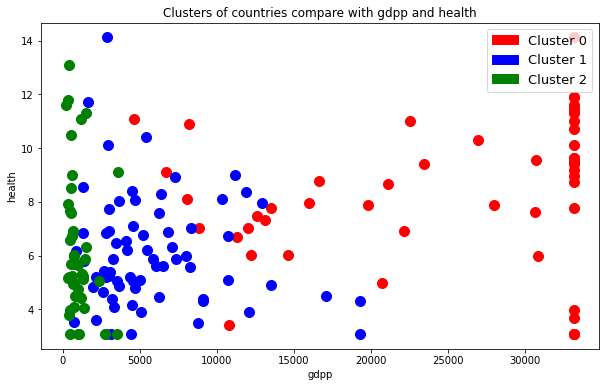

In [100]:
X = data.iloc[:, 1:].values
y_kmeans_pred = pred

gdpp_index = list(data.columns).index('gdpp') - 1 # minus one since we removed country name from X
health_index = list(data.columns).index('health') - 1
plt.figure(figsize=(10,6))
red_patch= ptch.Patch(color="red", label="Cluster 0")
blue_patch= ptch.Patch(color="blue", label="Cluster 1")
green_patch= ptch.Patch(color="green", label="Cluster 2")
plt.legend(handles=[red_patch, blue_patch, green_patch], loc=1, prop={'size': 13})
plt.title('Clusters of countries compare with gdpp and health')
plt.xlabel('gdpp')
plt.ylabel('health')
plt.scatter(X[y_kmeans_pred == 0, gdpp_index], X[y_kmeans_pred == 0, health_index], s = 100, c = 'red')
plt.scatter(X[y_kmeans_pred == 1, gdpp_index], X[y_kmeans_pred == 1, health_index], s = 100, c = 'blue')
plt.scatter(X[y_kmeans_pred == 2, gdpp_index], X[y_kmeans_pred == 2, health_index], s = 100, c = 'green')

We can say based on the above plot that these are the Ranking:

**Green Cluster** : These are the countries that need immediate help. They have low Gdpp. Also many of them have meduim to high health expenses.

**Blue Cluster** countries that do not need help. Although they have low to meduim Gdpp,they managed to have a health expense relative to their income. (Probably by having a very efficient health system)

**Red Cluster** : These are the countries that do not need help. Their health system is efficient like the green cluster but they have higher Gdpp.

In [102]:
# Green clusters countries
data.iloc[:, 0].values[y_kmeans_pred==2]

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Eritrea',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India',
       'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

In [103]:
# Blue clusters countries
data.iloc[:, 0].values[y_kmeans_pred==1]

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Fiji', 'Gabon', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Indonesia', 'Iran', 'Iraq',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Libya',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Morocco',
       'Namibia', 'Oman', 'Paraguay', 'Peru', 'Philippines', 'Romania',
       'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Solomon Islands',
       'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Thailand', 'Tonga', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam'], dtype=obj

In [104]:
# Red clusters countries
data.iloc[:, 0].values[y_kmeans_pred==0]

array(['Antigua and Barbuda', 'Australia', 'Austria', 'Bahamas',
       'Bahrain', 'Barbados', 'Belgium', 'Bosnia and Herzegovina',
       'Brunei', 'Canada', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania',
       'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'New Zealand',
       'Norway', 'Panama', 'Poland', 'Portugal', 'Qatar', 'Seychelles',
       'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)